# Dataset Link: https://www.kaggle.com/datasets/saurabhshahane/urdu-news-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
df=pd.read_csv('urdu-news-dataset.csv',encoding='utf-8')
df

C:\Users\moizk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Index,Headline,News Text,Category,Date,URL,Source,News length
0,0,عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی ...,اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...,Business & Economics,06-12-2020,https://www.dawnnews.tv/news/1148499/,Dawn News,1854.0
1,1,مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد م...,اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...,Business & Economics,06-12-2020,https://www.dawnnews.tv/news/1148498/,Dawn News,2016.0
2,2,جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ ...,اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...,Business & Economics,05-12-2020,https://www.dawnnews.tv/news/1148433/,Dawn News,2195.0
3,3,برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد,اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...,Business & Economics,05-12-2020,https://www.dawnnews.tv/news/1148430/,Dawn News,2349.0
4,4,کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانو...,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...,Business & Economics,05-12-2020,https://www.dawnnews.tv/news/1148421/,Dawn News,2655.0
...,...,...,...,...,...,...,...,...
111857,111856,اسٹاک مارکیٹ 42000 کی حد بھی پھلانگ گئی,288 پوائنٹس ریکور انڈیکس 42004 پر گیا 67 فیصد ...,Business & Economics,ہفتہ 3 نومبر 2018,https://www.express.pk/story/1407372/6,Express News,1185.0
111858,111857,ڈالر انٹربینک مارکیٹ میں مزید پیسے مہنگا,132 روپے 56 پیسے پر گیا اوپن مارکیٹ میں 50 پیس...,Business & Economics,ہفتہ 3 نومبر 2018,https://www.express.pk/story/1407371/6,Express News,1047.0
111859,111858,ذائقے دار دودھ کے نام پر بننے والے ڈیری ڈرنکس ...,اسٹور اور فروخت کرنے پر پابندی ہو گی ڈی جی فوڈ...,Business & Economics,ہفتہ 3 نومبر 2018,https://www.express.pk/story/1407370/6,Express News,1202.0
111860,111859,پٹرولیم مصنوعات مہنگی ہونے سے مہنگائی کا نیا ط...,ٹرانسپورٹرز نے کرائے بڑھا دیے لنڈا بازار میں ب...,Business & Economics,جمعـء 2 نومبر 2018,https://www.express.pk/story/1405560/6,Express News,1045.0


In [4]:
df.shape

(111862, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111862 entries, 0 to 111861
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Index        111862 non-null  object 
 1   Headline     111862 non-null  object 
 2   News Text    111840 non-null  object 
 3   Category     111860 non-null  object 
 4   Date         111860 non-null  object 
 5   URL          111860 non-null  object 
 6   Source       111859 non-null  object 
 7   News length  111859 non-null  float64
dtypes: float64(1), object(7)
memory usage: 6.8+ MB


In [6]:
df.drop(['Index','Date','URL','Source'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

Headline        0
News Text      22
Category        2
News length     3
dtype: int64

In [8]:
df.dropna(axis='rows',inplace=True)

In [9]:
df.isnull().sum()

Headline       0
News Text      0
Category       0
News length    0
dtype: int64

In [10]:
df['Category'].value_counts()

Sports                  44824
Entertainment           34898
Business & Economics    24119
Science & Technology     7997
Name: Category, dtype: int64

Text(0.5, 1.0, 'The label percentage in dataset')

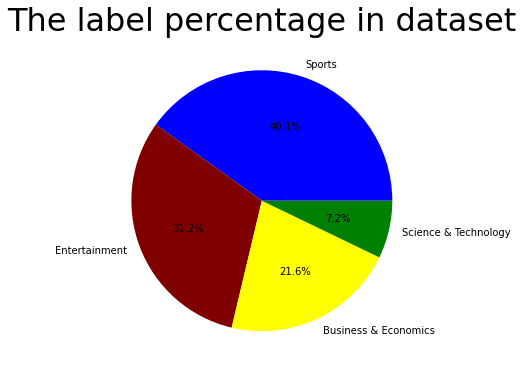

In [11]:
#to visuaize the label percentage in the train dataset
cat=df['Category'].value_counts()
#to visualize the above information in the pie chart
plt.figure(figsize=(18,6))
plt.pie(cat,labels=['Sports','Entertainment','Business & Economics','Science & Technology'],colors=['blue','maroon','yellow','green'],autopct='%1.1f%%',)
#set the title name with fontsize 
plt.title("The label percentage in dataset",fontsize=32)

In [11]:
df

,Headline,News Text,Category,News length
0,عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی ...,اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...,Business & Economics,1854.0
1,مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد م...,اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...,Business & Economics,2016.0
2,جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ ...,اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...,Business & Economics,2195.0
3,برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد,اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...,Business & Economics,2349.0
4,کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانو...,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...,Business & Economics,2655.0
...,...,...,...,...
111856,زرمبادلہ کے سرکاری ذخائر میں مزید کروڑ 80 لاکھ...,26 اکتوبر کو زرمبادلہ کے ذخائر 14 ارب 18 کروڑ ...,Business & Economics,603.0
111857,اسٹاک مارکیٹ 42000 کی حد بھی پھلانگ گئی,288 پوائنٹس ریکور انڈیکس 42004 پر گیا 67 فیصد ...,Business & Economics,1185.0
111858,ڈالر انٹربینک مارکیٹ میں مزید پیسے مہنگا,132 روپے 56 پیسے پر گیا اوپن مارکیٹ میں 50 پیس...,Business & Economics,1047.0
111859,ذائقے دار دودھ کے نام پر بننے والے ڈیری ڈرنکس ...,اسٹور اور فروخت کرنے پر پابندی ہو گی ڈی جی فوڈ...,Business & Economics,1202.0


In [12]:
df['News Text'][100]

'ملک میں سونے کی فی تولہ قیمت میں ایک بار پھر 1650 روپے کی بڑی کمی دیکھنے میں ئی ہےل سندھ صراف اینڈ جیولرز ایسوسی ایشن کے مطابق ملک میں 24 قیراط سونے کی فی تولہ قیمت 1650 روپے کمی کے بعد ایک لاکھ 11 ہزار 600 روپے ہوگئی ہےاسی طرح 10 گرام سونا 1414 روپے سستا ہوکر 95 ہزار 680 روپے کا ہوگیا ہےمقامی مارکیٹوں میں سونے کی قیمت میں نمایاں کمی کی وجہ عالمی مارکیٹ میں سونے کی قیمت میں واضح کمی ہے جہاں فی اونس سونا 22 ڈالر کم ہو کر 1872 ڈالر ہوگیایہ بھی پڑھیں پاکستان میں فی تولہ سونے کی قیمت میں نمایاں کمی واضح رہے کہ چند ماہ قبل عالمی مارکیٹ میں فی اونس سونے کی قیمت ہزار ڈالر سے تجاوز کر گئی تھی جس کا اثر مقامی مارکیٹ میں بھی نظر یاپاکستان میں اگست 2020 کے پہلے ہفتے میں سونے کی فی تولہ قیمت ایک لاکھ 32 ہزار روپے کی بلند ترین سطح تک پہنچ گئی تھیماہرین نے چین اور بھارت کی جانب سے سونے کی بڑھتی ہوئی خریداری امریکا اور چین کے درمیان کشیدگی میں اضافے سے اہم کرنسیوں کی قدر میں کمی سونے میں سرمایہ کاری بڑھنے اور کورونا وائرس کے باعث پیدا ہونے والے معاشی بحران کو مقامی اور بین الاقوامی مارکیٹوں میں سونے

# PART 1

## TAKING HEADLINE AS INDPENDENT COLUMN

In [13]:
X=df['Headline'].copy()
y=df['Category'].copy()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(74931, 46502) (36907, 46502) (74931,) (36907,)


In [16]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

C:\Users\moizk\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
logistic_pred=logistic.predict(X_test)
logistic_pred

array(['Entertainment', 'Entertainment', 'Entertainment', ..., 'Sports',
       'Sports', 'Entertainment'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#Check the test score and train score to the model
print(f'The Logisticregression model test score is {logistic.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Logisticregression model train scores is {logistic.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The logisticRegression accuracy_score {accuracy_score(y_test,logistic_pred)*100:.2f}')

The Logisticregression model test score is 93.94
The Logisticregression model train scores is 96.29
The logisticRegression accuracy_score 93.94


                      precision    recall  f1-score   support

Business & Economics       0.95      0.96      0.95      7981
       Entertainment       0.91      0.94      0.92     11407
Science & Technology       0.89      0.78      0.83      2649
              Sports       0.97      0.96      0.96     14870

            accuracy                           0.94     36907
           macro avg       0.93      0.91      0.92     36907
        weighted avg       0.94      0.94      0.94     36907



<AxesSubplot:>

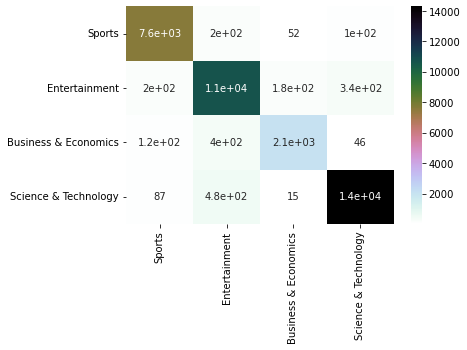

In [19]:
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='cubehelix_r',xticklabels=['Sports','Entertainment','Business & Economics','Science & Technology'],yticklabels=['Sports','Entertainment','Business & Economics','Science & Technology'])

In [20]:
df1=pd.DataFrame(logistic_pred,y_test)

In [21]:
df1.rename(columns = {0:'Pred'}, inplace = True)

df1.set_axis([ 'Pred'], axis='columns', inplace=True)

In [22]:
df1

,Pred
Category,
Sports,Entertainment
Entertainment,Entertainment
Entertainment,Entertainment
Sports,Sports
Sports,Sports
...,...
Sports,Sports
Entertainment,Entertainment
Sports,Sports


# PART 2

## NOW TAKING INDEPENDENT COLUMN AS NEWS TEXT INSTEAD OF HEADLINE

In [13]:
X=df['News Text'].copy()
y=df['Category'].copy()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(74931, 405080) (36907, 405080) (74931,) (36907,)


In [16]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

C:\Users\moizk\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
logistic_pred=logistic.predict(X_test)
logistic_pred

array(['Sports', 'Entertainment', 'Entertainment', ..., 'Sports',
       'Sports', 'Entertainment'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#Check the test score and train score to the model
print(f'The Logisticregression model test score is {logistic.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Logisticregression model train scores is {logistic.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The logisticRegression accuracy_score {accuracy_score(y_test,logistic_pred)*100:.2f}')

The Logisticregression model test score is 97.09
The Logisticregression model train scores is 98.16
The logisticRegression accuracy_score 97.09


                      precision    recall  f1-score   support

Business & Economics       0.97      0.98      0.98      7981
       Entertainment       0.96      0.96      0.96     11407
Science & Technology       0.90      0.90      0.90      2649
              Sports       0.99      0.98      0.99     14870

            accuracy                           0.97     36907
           macro avg       0.96      0.96      0.96     36907
        weighted avg       0.97      0.97      0.97     36907



<AxesSubplot:>

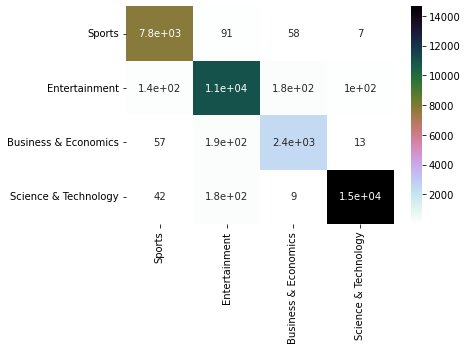

In [19]:
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='cubehelix_r',xticklabels=['Sports','Entertainment','Business & Economics','Science & Technology'],yticklabels=['Sports','Entertainment','Business & Economics','Science & Technology'])

In [20]:
df2=pd.DataFrame(logistic_pred,y_test)

In [21]:
df2.rename(columns = {0:'Pred'}, inplace = True)

In [22]:
df2

,Pred
Category,
Sports,Sports
Entertainment,Entertainment
Entertainment,Entertainment
Sports,Sports
Sports,Sports
...,...
Sports,Sports
Entertainment,Entertainment
Sports,Sports
